In [22]:
from kan import *


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

temp_n_var = 13
# create dataset
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f, n_var=temp_n_var, device=device,train_num=8600,test_num=1200 )

cpu


In [23]:
# Проверка размеров датасета
print(dataset['train_input'].shape)
print(dataset['train_label'].shape)
print(dataset['test_input'].shape)
print(dataset['test_label'].shape)


torch.Size([8600, 13])
torch.Size([8600, 1])
torch.Size([1200, 13])
torch.Size([1200, 1])


In [24]:
grids = np.array([3,10,20,50,100])


train_losses = []
test_losses = []
steps = 20
k = 3

for i in range(grids.shape[0]):
    if i == 0:
        model = KAN(width=[temp_n_var,1,1], grid=grids[i], k=k, seed=1, device=device)
    if i != 0:
        model = model.refine(grids[i])
    results = model.fit(dataset, opt="LBFGS", steps=steps)
    train_losses += results['train_loss']
    test_losses += results['test_loss']

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.51e-02 | test_loss: 1.66e-02 | reg: 7.43e+00 | : 100%|█| 20/20 [00:12<00:00,  1.66it


saving model version 0.1
saving model version 0.2


| train_loss: 3.24e-04 | test_loss: 3.37e-04 | reg: 7.40e+00 | : 100%|█| 20/20 [00:12<00:00,  1.65it


saving model version 0.3
saving model version 0.4


| train_loss: 2.58e-05 | test_loss: 3.10e-05 | reg: 7.40e+00 | : 100%|█| 20/20 [00:14<00:00,  1.34it


saving model version 0.5
saving model version 0.6


| train_loss: 3.46e-05 | test_loss: 4.27e-05 | reg: 7.39e+00 | : 100%|█| 20/20 [00:32<00:00,  1.63s/


saving model version 0.7
saving model version 0.8


| train_loss: 1.43e-04 | test_loss: 2.06e-04 | reg: 7.42e+00 | : 100%|█| 20/20 [01:00<00:00,  3.04s/

saving model version 0.9


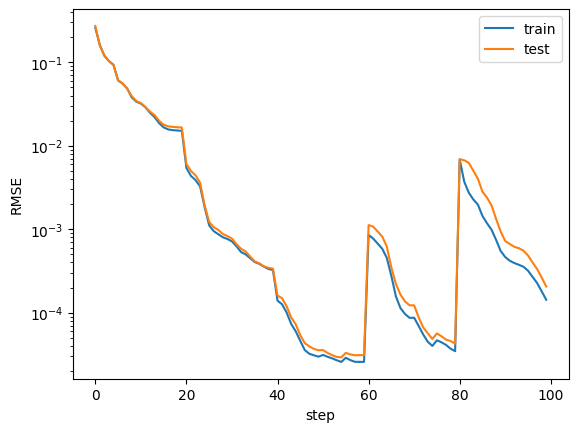

In [25]:
plt.plot(train_losses)
plt.plot(test_losses)
plt.legend(['train', 'test'])
plt.ylabel('RMSE')
plt.xlabel('step')
plt.yscale('log')

Text(0, 0.5, 'RMSE')

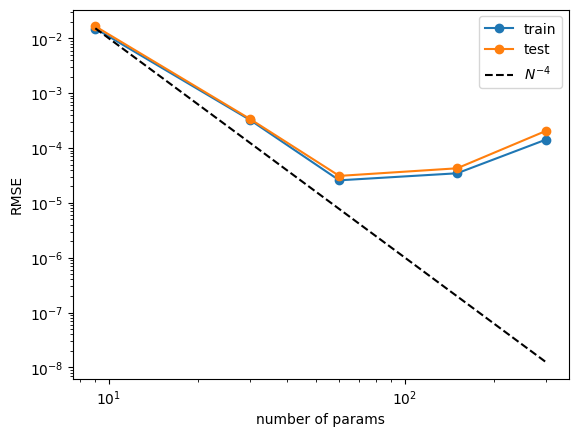

In [26]:
n_params = 3 * grids
train_vs_G = train_losses[(steps-1)::steps]
test_vs_G = test_losses[(steps-1)::steps]
plt.plot(n_params, train_vs_G, marker="o")
plt.plot(n_params, test_vs_G, marker="o")
plt.plot(n_params, 100*n_params**(-4.), ls="--", color="black")
plt.xscale('log')
plt.yscale('log')
plt.legend(['train', 'test', r'$N^{-4}$'])
plt.xlabel('number of params')
plt.ylabel('RMSE')